### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [76]:
data = pd.read_csv('data/coupons.csv')

In [77]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

    Ans: I do see "age" and "expiration" columns are object type. I think chnaging them to int can  help on analysis. But I am not considering "age" column to chnage now as there are 2 values that can not be chnaged to int. Also the 6 columns with null value can not be droped as they are valid data. So changing them to "No info"

In [95]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...
    
    Ans: There are 6 columns which has missing data:  "car", "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50". these columns are not intergers. We can not drop those rows as there are coupons accecpted in those row. So I am considering those as "info not available". Therefore marking those missing data as "No info"

In [96]:
# replace the missing data
data[['car']] = data[['car']].fillna('No info')
data[['Bar']] = data[['Bar']].fillna('No info')
data[['CoffeeHouse']] = data[['CoffeeHouse']].fillna('No info')
data[['CarryAway']] = data[['CarryAway']].fillna('No info')
data[['RestaurantLessThan20']] = data[['RestaurantLessThan20']].fillna('No info')
data[['Restaurant20To50']] = data[['Restaurant20To50']].fillna('No info')

In [99]:
#change the datatype to int for expiration
data['expiration'].value_counts()
data["expiration"]=data["expiration"].astype(str).str.replace("1d","24")
data["expiration"]=data["expiration"].astype(str).str.replace("2h","2")
data["expiration"]=pd.to_numeric(data["expiration"])

#change the datatype to int for age
data['age'].value_counts()
#data["age"]=pd.to_numeric(data["age"])

data['income'].value_counts()


#data.info()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [122]:
#proportion of Accepted coupons
accepted = (data.query(' Y == 1')[['Y']].count())/data[['Y']].count()
print("accepted ", accepted)

#proportion of Not accepted coupons
not_accepted = (data.query(' Y == 0')[['Y']].count())/data[['Y']].count()
print("Not accepted",not_accepted)

accepted  Y    0.568433
dtype: float64
Not accepted Y    0.431567
dtype: float64


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

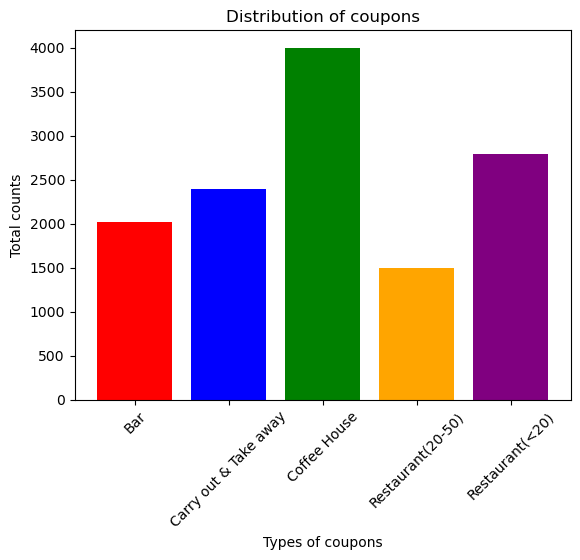

In [165]:
df = data.groupby(['coupon']).size().rename('Count').reset_index()
plt.bar(df["coupon"],df['Count'], color = ['red','blue','green', 'orange','purple'])
plt.title('Distribution of coupons')
plt.xlabel('Types of coupons')
plt.ylabel('Total counts')
plt.xticks(rotation = 45)

6. Use a histogram to visualize the temperature column.

In [178]:
fig = px.histogram(data, x="temperature",color="temperature")
fig.update_layout(bargap=0.2)
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [198]:
df_bar = pd.DataFrame(data.query('coupon == "Bar"')[["coupon"]])
df_bar

,coupon
9,Bar
13,Bar
17,Bar
24,Bar
35,Bar
...,...
12663,Bar
12664,Bar
12667,Bar
12670,Bar


2. What proportion of bar coupons were accepted?


In [203]:
ans_bar_coupon_accepted = data.query('coupon == "Bar" & Y == 1')[['coupon']].count()/df_bar.count()
print("proportion of bar coupons were accepted : ",ans_bar_coupon_accepted.values)

proportion of bar coupons were accepted :  [0.41001487]


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
   
   Ans: Acceptance rate between "those who went to a bar 3 or fewer times a month" to "those who went more" is 1.733935 times


In [226]:
data[['Bar']].value_counts()
ans_3_or_fewer = data.query("Bar == '1~3' & Y == 1").dropna()[["Bar", "Y"]].count()
ans_went_more = data.query('(Bar == "4~8" | Bar == "gt8" ) & Y == 1').dropna()[["Bar", "Y"]].count()
#print ("went more",ans_went_more.values)
#print("went 3 or less",ans_3_or_fewer )
#acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
acceptance_rate = ans_3_or_fewer / ans_went_more
print ("Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more:",acceptance_rate)

Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more: Bar    1.733935
Y      1.733935
dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [369]:
# Goes to Bar only
df_only_bar = data.query("coupon == 'Bar'")

data[['Bar']].value_counts()
more_than_once = ['1~3','4~8','gt8']
over_age_25 = ['26','31','50plus','36','41','46']

#acceptance rate between drivers who go to a bar more than once a month 
driver_more_than_once_over_age_25_toBar = df_only_bar.query('(Bar in @more_than_once) & (age in @over_age_25) & (Y == 1)')[['Bar']].count().iloc[0]
driver_more_than_once_over_age_25_toBarAll = df_only_bar.query('(Bar in @more_than_once) & (age in @over_age_25)')[['Bar']].count().iloc[0]
rate_driverMoreThanOnceOverAge25 = driver_more_than_once_over_age_25_toBar/driver_more_than_once_over_age_25_toBarAll

#over the age of 25 
driver_over_age_25_toBar = df_only_bar.query('(age in @over_age_25) & (Y == 1)')[['Bar']].count().iloc[0]
driver_over_age_25_toBarAll = df_only_bar.query('(age in @over_age_25)')[['Bar']].count().iloc[0]
rate_driverOverAge25 = driver_over_age_25_toBar/driver_over_age_25_toBarAll

driver_more_than_once = df_only_bar.query('(Bar in @more_than_once) & (Y == 1)')[['Bar']]

#All others : 
not_more_than_once = ['never', 'less1','No info']
not_over_age_25 = ['21','below21']
all_others = data.query('(Bar in @not_more_than_once) & (age in @not_over_age_25) & (Y == 1)')[['Bar']].count().iloc[0]
all_othersAll = data.query('(Bar in @not_more_than_once) & (age in @not_over_age_25)')[['Bar']].count().iloc[0]
rate_All_other = all_others/all_othersAll


df = pd.DataFrame({'rate_name':['rate_driverMoreThanOnceOverAge25','rate_driverOverAge25','rate_All_other']
                   ,'rate_value':[rate_driverMoreThanOnceOverAge25,rate_driverOverAge25,rate_All_other]
                  })
fig = px.bar(df, x="rate_name",y = 'rate_value',color = 'rate_name')
fig.update_layout(bargap=0.2)
fig.show()

Finding - Drivers who are over 25 years old have much more acceptance rate than drivers who are working driver goes to bar more than once a month. more than 25 years age group's going rate to bar is more than who goes to more than once and over age 25. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [367]:
# Goes to Bar only
df_only_bar = data.query("coupon == 'Bar'")
data[['Bar']].value_counts()
#more than once
more_than_once = ['1~3','4~8','gt8']
# had passengers that were not a kid 
not_a_kid = ['Alone','Friend(s)','Partner']
#had occupations other than farming, fishing, or forestry.
occupartion_farmingfishingforestert = ['Farming Fishing & Forestry']


#acceptance drivers who go to bars more than once a month 
driver_more_than_once = df_only_bar.query('(Bar in @more_than_once) & (Y == 1)')[['Bar']].count().iloc[0]
driver_more_than_onceAll = df_only_bar.query('(Bar in @more_than_once) ')[['Bar']].count().iloc[0]
acceptanceRate_moreThanOnce = driver_more_than_once/driver_more_than_onceAll

#acceptance drivesr who had passengers that were not a kid 
driver_passanger_not_kid = df_only_bar.query('(passanger in @not_a_kid) & (Y == 1)')[['Bar']].count().iloc[0]
driver_passanger_not_kidAll = df_only_bar.query('(passanger in @not_a_kid)')[['Bar']].count().iloc[0]
acceptanceRate_passangerNoTKid = driver_passanger_not_kid/driver_passanger_not_kidAll

#acceptance driver who had occupations other than farming, fishing, or forestry.
driver_occupation_fff = df_only_bar.query('(occupation not in @occupartion_farmingfishingforestert) & (Y == 1)')[['Bar']].count().iloc[0]
driver_occupation_fffAll = df_only_bar.query('(occupation not in @occupartion_farmingfishingforestert)')[['Bar']].count().iloc[0]
acceptanceRate_driverOccupationFFF = driver_occupation_fff/driver_occupation_fffAll

#all the above condition
driver_moreThanOnce_passangerNoKid_occFFF = df_only_bar.query('(Bar in @more_than_once) & (passanger in @not_a_kid) & (occupation not in @occupartion_farmingfishingforestert) & (Y == 1)')[['Bar']].count().iloc[0]
driver_moreThanOnce_passangerNoKid_occFFFAll = df_only_bar.query('(Bar in @more_than_once) & (passanger in @not_a_kid) & (occupation not in @occupartion_farmingfishingforestert) & (Y == 1)')[['Bar']].count().iloc[0]
acceptanceRate_driverMoreThanOncePassangerNoKidOccFFF = driver_moreThanOnce_passangerNoKid_occFFF/driver_moreThanOnce_passangerNoKid_occFFFAll


print(driver_all_accpeted)
#Values
#acceptanceRate_moreThanOnce = (driver_more_than_once[['Bar']].count().iloc[0])/driver_all_accpeted
#acceptanceRate_passangerNoTKid = (driver_passanger_not_kid[['Bar']].count().iloc[0])/driver_all_accpeted
#acceptanceRate_driverOccupationFFF = (driver_occupation_fff[['Bar']].count().iloc[0])/driver_all_accpeted
#acceptanceRate_driverMoreThanOncePassangerNoKidOccFFF = (driver_moreThanOnce_passangerNoKid_occFFF[['Bar']].count().iloc[0])/driver_all_accpeted


df1 = pd.DataFrame({'rate_name':['acceptanceRate_moreThanOnce','acceptanceRate_passangerNoTKid','acceptanceRate_driverOccupationFFF','acceptanceRate_driverMoreThanOncePassangerNoKidOccFFF']
                   ,'rate_value':[acceptanceRate_moreThanOnce,acceptanceRate_passangerNoTKid,acceptanceRate_driverOccupationFFF,acceptanceRate_driverMoreThanOncePassangerNoKidOccFFF]
                  })
fig = px.bar(df1, x="rate_name",y = 'rate_value',color = 'rate_name')
fig.update_layout(bargap=0.2)
fig.show()


12684


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [406]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
goToBarOnceAMonth_hadPassangerNotKid_notWidow = data.query('(maritalStatus != "Widowed" ) & (Bar in @more_than_once)& (passanger in @not_a_kid) & (Y == 1)')[['Bar']].count().iloc[0]
goToBarOnceAMonth_hadPassangerNotKid_notWidowAll = data.query('(maritalStatus != "Widowed" ) & (Bar in @more_than_once)& (passanger in @not_a_kid)')[['Bar']].count().iloc[0]
rate_goToBarOnceAMonth_hadPassangerNotKid_notWidow = goToBarOnceAMonth_hadPassangerNotKid_notWidow/goToBarOnceAMonth_hadPassangerNotKid_notWidowAll

#go to bars more than once a month and are under the age of 30 *OR*
data[['age']].value_counts()
under30 = ['21','26','below21' ]
goToBarOnceAMonth_underAge30 = data.query('(Bar in @more_than_once) & (age in @under30) & Y ==1')[['Bar']].count().iloc[0]
goToBarOnceAMonth_underAge30All = data.query('(Bar in @more_than_once) & (age in @under30)')[['Bar']].count().iloc[0]
rate_goToBarOnceAMonth_underAge30 = goToBarOnceAMonth_underAge30/goToBarOnceAMonth_underAge30All

#go to cheap restaurants more than 4 times a month and income is less than 50K. 
cheapRestaurantMoreThan4Times = ['4~8','gt8']
incomeLessthan50K = ['$25000 - $37499', '$37500 - $49999']
goToCheacpRestMoreThan4TimesLessThan50K = data.query('(RestaurantLessThan20 in @cheapRestaurantMoreThan4Times) & (income in @incomeLessthan50K) & Y ==1').count().iloc[0]
goToCheacpRestMoreThan4TimesLessThan50KAll = data.query('(RestaurantLessThan20 in @cheapRestaurantMoreThan4Times) & (income in @incomeLessthan50K)').count().iloc[0]
rate_goToCheacpRestMoreThan4TimesLessThan50K = goToCheacpRestMoreThan4TimesLessThan50K/goToCheacpRestMoreThan4TimesLessThan50KAll


df2 = pd.DataFrame({'rate_name':['rate_goToBarOnceAMonth_hadPassangerNotKid_notWidow','rate_goToBarOnceAMonth_underAge30','rate_goToCheacpRestMoreThan4TimesLessThan50K']
                   ,'rate_value':[rate_goToBarOnceAMonth_hadPassangerNotKid_notWidow,rate_goToBarOnceAMonth_underAge30,rate_goToCheacpRestMoreThan4TimesLessThan50K]
                  })
fig = px.bar(df2, x="rate_name",y = 'rate_value',color = 'rate_name', title= "Rate of acceptance for driver once once, under age 30 and income under 50k")
fig.update_layout(bargap=0.2)
fig.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* Drivers who are over 25 years old have much more acceptance rate than drivers who are working driver goes to bar more than once a month.
* more than 25 years age group's going rate to bar is more than who goes to more than once and over age 25.
* Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 100%
* go to bars more than once a month, had passengers that were not a kid, and were not widowed OR, go to bars more than once a month and are under the age of 30 OR, go to cheap restaurants more than 4 times a month and income is less than 50K , All the 3 conditions have same acceptance rate.
* So no significance in acceptance rate between drivers going to bar more than or less than once a month having kids as passanger at the time of receiving (accepting) the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [407]:
fig = px.histogram(data, x="passanger",color="Y",barmode="group", title="Coupon accepted Vs passanger type")
fig.update_layout(bargap=0.2)
fig.show()

Drivers who drive alone seems gets more coupon and also accepts more coupon compraed to driver with friends, with kids and with partners

In [408]:
fig = px.histogram(data, x="temperature",color="Y",barmode="group", title = 'Temperture Vs Coupon accepted or rejected')
fig.update_layout(bargap=0.2)
fig.show()

In hot weather more coupons available, more accepted and more rejected as well compared to others

In [409]:
fig = px.histogram(data, x="maritalStatus",color="Y",barmode="group", title = 'Marital status Vs Coupon accepted or rejected')
fig.update_layout(bargap=0.2)
fig.show()


1. Wondows uses least coupons
2. Single and mariied both accepts more coupons

In [410]:
fig = px.histogram(data.query('Y ==1'), x="occupation",color="coupon",barmode="group", title = "Types of coupon acceoted for any occupation ")
fig.update_layout(bargap=0.2)
fig.show()


Strudents and unemployed accepts more coupons compared other groups. 

In [411]:
fig = px.histogram(data, x="coupon",color="Y",barmode="group", title= "Type of Coupon Vs accepted/reject coupons")
fig.update_layout(bargap=0.2)
fig.show()


Cheaper resturant, carryout & take away coupons and Coffee house coupon's acceptance rate is better compared to var and expensive coupon

In [412]:
over_age_25 = ['26','31','50plus','36','41','46']
#OVER AGE 25
fig = px.histogram(data.query('Y == 1 & (age in @over_age_25)'), x="coupon",color="gender",barmode="group", title = 'Over age 25 accepted coupons for all genders')
fig.update_layout(bargap=0.2)
fig.show()
#UNDER AGE 25
fig1 = px.histogram(data.query('Y == 1 & (age not in @over_age_25)'), x="coupon",color="gender",barmode="group",title = 'Under age 25 accepted coupons for all genders')
fig1.update_layout(bargap=0.2)
fig1.show()


under age 25, male accepts more coupons than female in all coupon types. 
Over 25 age acceptance is distributed. Females accepts more coupons for cheaper resturant, coffee and carry out.

In [413]:
#no children
fig = px.histogram(data.query('Y == 1 & (has_children !=0)'), x="coupon",color="gender",barmode="group", title = 'No child Vs accpeted coupons for any kind')
fig.update_layout(bargap=0.2)
fig.show()
#has children
fig1 = px.histogram(data.query('Y == 1 & (has_children !=0)'), x="coupon",color="gender",barmode="group", title = 'child Vs accpeted coupons for any kind')
fig1.update_layout(bargap=0.2)
fig1.show()


Has child does not impact on accepting coupons